# Praktikum Imbalanced Class

In [48]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, roc_curve, auc, f1_score, accuracy_score,confusion_matrix
colnames =['ID', 'Class', 'Gender (X1)', 'Status IMT (X2)', 'Berkacamata (X3)', 'Pernah Sakit (X4)', 'Gangguan Psikis (X5)', 'Aktif Bertanya (X6)','Aktif Menjawab (X7)', 'Mengerjakan Tugas (X8)', 'Tertarik Materi (X9)', 'Alokasi Jam Belajar (X10)', 'Memiliki Referensi Tambahan (X11)', 'Browsing dan Youtube (X12)', 'Mengulang Materi (X13)', 'Praktek Mandiri (X14)', 'Berdiskusi (X15)', 'Memiliki HP (X16)', 'Memiliki Laptop (X17)', 'Kecukupan Kuota (X18)', 'Dukungan Suasana rumah (X19)', 'PLN (X20)', 'Lokasi (X21)', 'Ketersediaan Sinyal (X22)']
df=pd.read_csv('../resource/academic.csv',names=colnames)

In [49]:
df.head()

,ID,Class,Gender (X1),Status IMT (X2),Berkacamata (X3),Pernah Sakit (X4),Gangguan Psikis (X5),Aktif Bertanya (X6),Aktif Menjawab (X7),Mengerjakan Tugas (X8),...,Mengulang Materi (X13),Praktek Mandiri (X14),Berdiskusi (X15),Memiliki HP (X16),Memiliki Laptop (X17),Kecukupan Kuota (X18),Dukungan Suasana rumah (X19),PLN (X20),Lokasi (X21),Ketersediaan Sinyal (X22)
0,1,0,P,NORMAL,Tidak,Tidak,Tidak,Ya,Ya,Semua,...,Kadang-kadang,Kadang-kadang,Ya,Ya,Ya,Tidak,Kadang-kadang,Ya,Pedesaan,Sebagian
1,2,2,L,GEMUK,Ya,Tidak,Tidak,Tidak,Tidak,Semua,...,Kadang-kadang,Kadang-kadang,Tidak,Ya,Ya,Ya,Ya,Ya,Perkotaan,Ya
2,3,2,P,NORMAL,Ya,Tidak,Tidak,Tidak,Tidak,Semua,...,Kadang-kadang,Kadang-kadang,Ya,Ya,Ya,Ya,Ya,Ya,Perkotaan,Sebagian
3,4,2,P,NORMAL,Tidak,Ya,Tidak,Tidak,Tidak,Semua,...,Kadang-kadang,Ya,Ya,Ya,Ya,Ya,Kadang-kadang,Ya,Perkotaan,Ya
4,5,0,P,NORMAL,Tidak,Ya,Ya,Ya,Ya,Semua,...,Kadang-kadang,Kadang-kadang,Ya,Ya,Ya,Kadang-kadang,Ya,Ya,Perkotaan,Sebagian


In [50]:
col =['Gender (X1)', 'Status IMT (X2)', 'Berkacamata (X3)', 'Pernah Sakit (X4)', 'Gangguan Psikis (X5)', 'Aktif Bertanya (X6)','Aktif Menjawab (X7)', 'Mengerjakan Tugas (X8)', 'Tertarik Materi (X9)', 'Alokasi Jam Belajar (X10)', 'Memiliki Referensi Tambahan (X11)', 'Browsing dan Youtube (X12)', 'Mengulang Materi (X13)', 'Praktek Mandiri (X14)', 'Berdiskusi (X15)', 'Memiliki HP (X16)', 'Memiliki Laptop (X17)', 'Kecukupan Kuota (X18)', 'Dukungan Suasana rumah (X19)', 'PLN (X20)', 'Lokasi (X21)', 'Ketersediaan Sinyal (X22)']
academic_df_dummies = pd.get_dummies(df, prefix=col)
print(academic_df_dummies)

X=academic_df_dummies.drop(['Class'],axis=1)
y=academic_df_dummies['Class']


    ID  Class  Gender (X1)_L  Gender (X1)_P  Status IMT (X2)_GEMUK  \
0    1      0              0              1                      0   
1    2      2              1              0                      1   
2    3      2              0              1                      0   
3    4      2              0              1                      0   
4    5      0              0              1                      0   
..  ..    ...            ...            ...                    ...   
86  87      1              1              0                      0   
87  88      2              1              0                      0   
88  89      0              1              0                      0   
89  90      1              1              0                      0   
90  91      2              1              0                      0   

    Status IMT (X2)_KURUS  Status IMT (X2)_NORMAL  Status IMT (X2)_OBESITAS  \
0                       0                       1                         0   
1

In [51]:
#menghtung jumlah anggota tiap kelas
y.value_counts()

1    32
0    29
2    28
3     2
Name: Class, dtype: int64

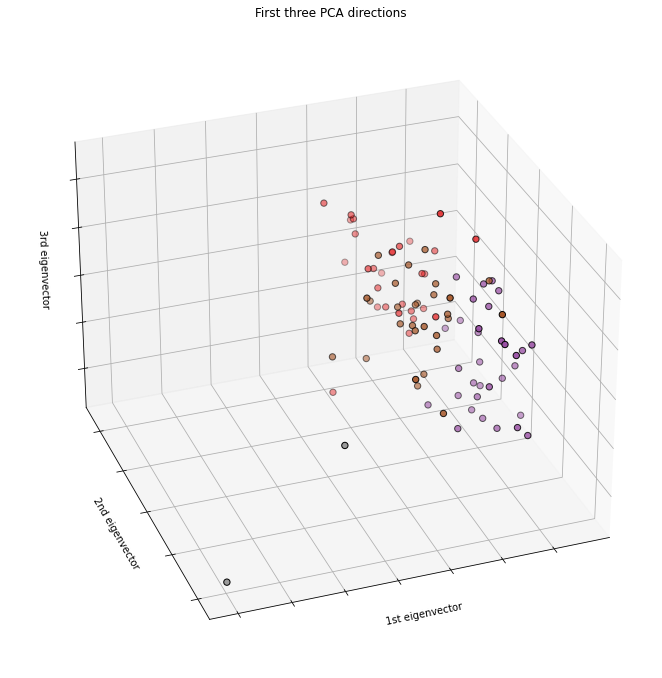

The number of features in the new subspace is  3


In [52]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
fig = plt.figure(1, figsize=(16, 9))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(X_scaled)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()
print("The number of features in the new subspace is " ,X_reduced.shape[1])

In [53]:
# Split dataset into training set and test set
# from sklearn.model_selection import train_test_split # Import train_test_split function
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 70% training and 30% test

# Decision Tree

In [54]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
import sklearn.metrics as metrics
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
skf = StratifiedKFold(n_splits = 3, shuffle=True, random_state=0)
dt = DecisionTreeClassifier()
params_dt = {'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': np.arange(0,15)}
dt = GridSearchCV(dt, param_grid=params_dt, scoring='accuracy', cv=skf)
dt = dt.fit(X,y)
print(clf.best_params_, clf.best_score_)


{'criterion': 'entropy', 'max_depth': 7, 'splitter': 'best'} 0.6272401433691756


# KNN

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
params_knn = {'n_neighbors': np.arange(2, 61), 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
knn = GridSearchCV(knn, param_grid = params_knn, scoring='accuracy', cv = skf)
knn.fit(X,y)
print(knn.best_params_, knn.best_score_)

{'algorithm': 'auto', 'n_neighbors': 2, 'weights': 'distance'} 0.5942652329749104


# NB

In [56]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb_params = {'var_smoothing': np.logspace(0, -15, 100)}
gnb = GridSearchCV(gnb, param_grid=gnb_params, scoring='accuracy', cv = skf)
gnb.fit(X, y)
print(gnb.best_params_, gnb.best_score_)


{'var_smoothing': 0.00046415888336127773} 0.9010752688172042


# SVM

In [57]:
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')
svc = SVC()
params_svc = {'C': np.logspace(start = -35, stop=100, base=1.05), 'kernel':['linear', 'poly', 'rbf', 'sigmoid'], 'gamma':['auto', 'scale']}
svc = GridSearchCV(svc, param_grid=params_svc, scoring='accuracy', cv=3)
svc.fit(X,y)
print(svc.best_params_, svc.best_score_)

{'C': 0.6078307435713777, 'gamma': 'auto', 'kernel': 'linear'} 0.6351254480286739


# Random Forest

In [58]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
params_rf = {'n_estimators': np.arange(10, 100), 'criterion':['gini','entropy']}
rf = GridSearchCV(rf, param_grid=params_rf, scoring='accuracy', cv=3)
rf.fit(X,y)
print(rf.best_params_, rf.best_score_)

{'criterion': 'entropy', 'n_estimators': 64} 0.8243727598566308


# Regresi Logistic

In [59]:
from sklearn.linear_model import LogisticRegression
rl = LogisticRegression()
params_rl = {'penalty': ['l1', 'l2', 'elasticnet', 'none'], 'C': np.logspace(0, -15, 100), 'dual': [True, False]}
rl = GridSearchCV(rl, param_grid=params_rl, scoring='accuracy', cv=skf)
rl.fit(X,y)
print(rl.best_params_, rl.best_score_)

{'C': 0.24770763559917108, 'dual': False, 'penalty': 'l2'} 0.8799283154121863


Class=0, n=29 (31.868%)
Class=2, n=28 (30.769%)
Class=1, n=32 (35.165%)
Class=3, n=2 (2.198%)


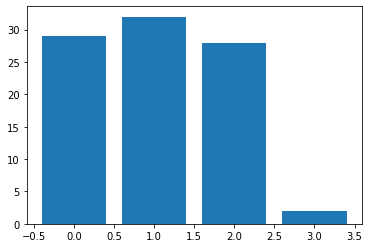

In [60]:
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from matplotlib import pyplot
y = LabelEncoder().fit_transform(y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

     ID  Gender (X1)_L  Gender (X1)_P  Status IMT (X2)_GEMUK  \
0     1              0              1                      0   
1     2              1              0                      1   
2     3              0              1                      0   
3     4              0              1                      0   
4     5              0              1                      0   
..   ..            ...            ...                    ...   
123  78              1              0                      0   
124  78              1              0                      0   
125  78              1              0                      0   
126  78              1              0                      0   
127  78              1              0                      0   

     Status IMT (X2)_KURUS  Status IMT (X2)_NORMAL  Status IMT (X2)_OBESITAS  \
0                        0                       1                         0   
1                        0                       0                     

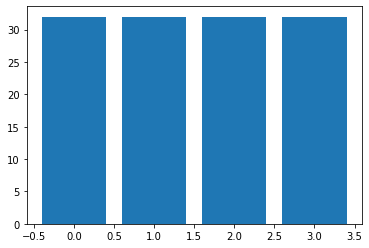

In [61]:

# label encode the target variable
y = LabelEncoder().fit_transform(y)
oversample = SMOTE(k_neighbors=1)
X, y = oversample.fit_resample(X, y)
print(X,y)
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [62]:
# Split dataset into training set and test set
from sklearn.model_selection import train_test_split # Import train_test_split function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 70% training and 30% test

In [63]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
import sklearn.metrics as metrics
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)
print( '\nClassification report\n' )
print(classification_report(y_test, y_pred))
print( '\nConfusion Matrix\n' )
print(confusion_matrix(y_test, y_pred),'\n')
print('Accuracy :','{:.2f}'.format(accuracy_score(y_test, y_pred)))
print('F-Score :','{:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
print('AUC:','{:.2f}'.format(metrics.auc(fpr, tpr)))



Classification report

              precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       0.75      0.86      0.80         7
           2       0.50      0.50      0.50         4
           3       1.00      1.00      1.00        12

    accuracy                           0.81        26
   macro avg       0.69      0.67      0.68        26
weighted avg       0.80      0.81      0.80        26


Confusion Matrix

[[ 1  0  2  0]
 [ 1  6  0  0]
 [ 0  2  2  0]
 [ 0  0  0 12]] 

Accuracy : 0.81
F-Score : 0.80
AUC: 0.09


In [64]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=43, weights='distance')
# Train Decision Tree Classifer
knn = knn.fit(X_train,y_train)
#Predict the response for test dataset
y_pred= knn.predict(X_test)
print( '\nClassification report\n' )
print(classification_report(y_test, y_pred))
print( '\nConfusion Matrix\n' )
print(confusion_matrix(y_test, y_pred),'\n')
print('Accuracy :','{:.2f}'.format(accuracy_score(y_test, y_pred)))
print('F-Score :','{:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
print('AUC:','{:.2f}'.format(metrics.auc(fpr, tpr)))


Classification report

              precision    recall  f1-score   support

           0       0.17      0.33      0.22         3
           1       0.50      0.29      0.36         7
           2       0.67      0.50      0.57         4
           3       0.92      1.00      0.96        12

    accuracy                           0.65        26
   macro avg       0.56      0.53      0.53        26
weighted avg       0.68      0.65      0.65        26


Confusion Matrix

[[ 1  1  1  0]
 [ 4  2  0  1]
 [ 1  1  2  0]
 [ 0  0  0 12]] 

Accuracy : 0.65
F-Score : 0.65
AUC: 0.17


In [65]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
# Train Decision Tree Classifer
nb= nb.fit(X_train,y_train)
#Predict the response for test dataset
y_pred= nb.predict(X_test)
print( '\nClassification report\n' )
print(classification_report(y_test, y_pred))
print( '\nConfusion Matrix\n' )
print(confusion_matrix(y_test, y_pred),'\n')
print('Accuracy :','{:.2f}'.format(accuracy_score(y_test, y_pred)))
print('F-Score :','{:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
print('AUC:','{:.2f}'.format(metrics.auc(fpr, tpr)))


Classification report

              precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       0.58      1.00      0.74         7
           2       0.00      0.00      0.00         4
           3       1.00      1.00      1.00        12

    accuracy                           0.77        26
   macro avg       0.52      0.58      0.53        26
weighted avg       0.68      0.77      0.71        26


Confusion Matrix

[[ 1  2  0  0]
 [ 0  7  0  0]
 [ 1  3  0  0]
 [ 0  0  0 12]] 

Accuracy : 0.77
F-Score : 0.71
AUC: 0.24


In [66]:
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')
c_SVC = np.logspace(start = 0, stop = 10, num = 100, base = 2 , dtype = 'float64')
param_grid_S = {'C': c_SVC}
clf_SVC = SVC(C=100.0, kernel='linear', degree=3, gamma='auto', coef0=0.0, shrinking=True, 
          probability=False, tol=0.001, cache_size=200, class_weight=None, 
          verbose=0, max_iter=-1, decision_function_shape="ovr", random_state = 0)
svc=clf_SVC.fit(X_train,y_train)
y_pred= svc.predict(X_test)
print( '\nClassification report\n' )
print(classification_report(y_test, y_pred))
print( '\nConfusion Matrix\n' )
print(confusion_matrix(y_test, y_pred),'\n')
print('Accuracy :','{:.2f}'.format(accuracy_score(y_test, y_pred)))
print('F-Score :','{:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
print('AUC:','{:.2f}'.format(metrics.auc(fpr, tpr)))


Classification report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.88      1.00      0.93         7
           2       1.00      0.75      0.86         4
           3       1.00      1.00      1.00        12

    accuracy                           0.96        26
   macro avg       0.97      0.94      0.95        26
weighted avg       0.97      0.96      0.96        26


Confusion Matrix

[[ 3  0  0  0]
 [ 0  7  0  0]
 [ 0  1  3  0]
 [ 0  0  0 12]] 

Accuracy : 0.96
F-Score : 0.96
AUC: 0.18


In [67]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier (n_estimators=100,random_state=0)
rf= rf.fit(X_train, y_train)
y_pred= rf.predict(X_test)
print( '\nClassification report\n' )
print(classification_report(y_test, y_pred))
print( '\nConfusion Matrix\n' )
print(confusion_matrix(y_test, y_pred),'\n')
print('Accuracy :','{:.2f}'.format(accuracy_score(y_test, y_pred)))
print('F-Score :','{:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
print('AUC:','{:.2f}'.format(metrics.auc(fpr, tpr)))


Classification report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.88      1.00      0.93         7
           2       1.00      0.75      0.86         4
           3       1.00      1.00      1.00        12

    accuracy                           0.96        26
   macro avg       0.97      0.94      0.95        26
weighted avg       0.97      0.96      0.96        26


Confusion Matrix

[[ 3  0  0  0]
 [ 0  7  0  0]
 [ 0  1  3  0]
 [ 0  0  0 12]] 

Accuracy : 0.96
F-Score : 0.96
AUC: 0.18


In [68]:
from sklearn.linear_model import LogisticRegression
rf = LogisticRegression(random_state=0)
rf= rf.fit(X_train, y_train)
y_pred= rf.predict(X_test)
print( '\nClassification report\n' )
print(classification_report(y_test, y_pred))
print( '\nConfusion Matrix\n' )
print(confusion_matrix(y_test, y_pred),'\n')
print('Accuracy :','{:.2f}'.format(accuracy_score(y_test, y_pred)))
print('F-Score :','{:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
print('AUC:','{:.2f}'.format(metrics.auc(fpr, tpr)))


Classification report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.88      1.00      0.93         7
           2       1.00      0.75      0.86         4
           3       1.00      1.00      1.00        12

    accuracy                           0.96        26
   macro avg       0.97      0.94      0.95        26
weighted avg       0.97      0.96      0.96        26


Confusion Matrix

[[ 3  0  0  0]
 [ 0  7  0  0]
 [ 0  1  3  0]
 [ 0  0  0 12]] 

Accuracy : 0.96
F-Score : 0.96
AUC: 0.18
